In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', None)


In [5]:
df = pd.read_csv(
    r"C:\project 2\ecommerce_dataset.csv"
)

df.head()


,order_id,order_date,customer_id,gender,age,city,product_category,product_name,quantity,unit_price,discount_percent,payment_mode,rating
0,2001,1/2/2024,C101,Male,26,Mumbai,Electronics,Wireless Earbuds,1,2999,10,UPI,4.5
1,2002,1/3/2024,C102,Female,34,Delhi,Clothing,Winter Jacket,2,3499,20,Credit Card,4.2
2,2003,1/4/2024,C103,Male,45,Bangalore,Home Appliances,Microwave Oven,1,12499,15,Debit Card,4.6
3,2004,1/5/2024,C104,Female,23,Pune,Beauty,Face Cleanser,3,499,5,UPI,4.1
4,2005,1/6/2024,C105,Male,39,Hyderabad,Electronics,Bluetooth Speaker,1,5999,25,Credit Card,4.7


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          10 non-null     int64  
 1   order_date        10 non-null     object 
 2   customer_id       10 non-null     object 
 3   gender            10 non-null     object 
 4   age               10 non-null     int64  
 5   city              10 non-null     object 
 6   product_category  10 non-null     object 
 7   product_name      10 non-null     object 
 8   quantity          10 non-null     int64  
 9   unit_price        10 non-null     int64  
 10  discount_percent  10 non-null     int64  
 11  payment_mode      10 non-null     object 
 12  rating            10 non-null     float64
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ KB


In [7]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Rows: 10
Columns: 13


In [8]:
df.isnull().sum()


order_id            0
order_date          0
customer_id         0
gender              0
age                 0
city                0
product_category    0
product_name        0
quantity            0
unit_price          0
discount_percent    0
payment_mode        0
rating              0
dtype: int64

In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
# Remove duplicates
df = df.drop_duplicates()

# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

df.head()


,order_id,order_date,customer_id,gender,age,city,product_category,product_name,quantity,unit_price,discount_percent,payment_mode,rating
0,2001,2024-01-02,C101,Male,26,Mumbai,Electronics,Wireless Earbuds,1,2999,10,UPI,4.5
1,2002,2024-01-03,C102,Female,34,Delhi,Clothing,Winter Jacket,2,3499,20,Credit Card,4.2
2,2003,2024-01-04,C103,Male,45,Bangalore,Home Appliances,Microwave Oven,1,12499,15,Debit Card,4.6
3,2004,2024-01-05,C104,Female,23,Pune,Beauty,Face Cleanser,3,499,5,UPI,4.1
4,2005,2024-01-06,C105,Male,39,Hyderabad,Electronics,Bluetooth Speaker,1,5999,25,Credit Card,4.7


In [11]:
df['total_sales'] = df['quantity'] * df['unit_price'] * (1 - df['discount_percent'] / 100)
df.head()


,order_id,order_date,customer_id,gender,age,city,product_category,product_name,quantity,unit_price,discount_percent,payment_mode,rating,total_sales
0,2001,2024-01-02,C101,Male,26,Mumbai,Electronics,Wireless Earbuds,1,2999,10,UPI,4.5,2699.10
1,2002,2024-01-03,C102,Female,34,Delhi,Clothing,Winter Jacket,2,3499,20,Credit Card,4.2,5598.40
2,2003,2024-01-04,C103,Male,45,Bangalore,Home Appliances,Microwave Oven,1,12499,15,Debit Card,4.6,10624.15
3,2004,2024-01-05,C104,Female,23,Pune,Beauty,Face Cleanser,3,499,5,UPI,4.1,1422.15
4,2005,2024-01-06,C105,Male,39,Hyderabad,Electronics,Bluetooth Speaker,1,5999,25,Credit Card,4.7,4499.25


In [12]:
df.describe()


,order_id,order_date,age,quantity,unit_price,discount_percent,rating,total_sales
count,10.00000,10,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2005.50000,2024-01-06 12:00:00,36.200000,1.400000,5109.000000,15.500000,4.380000,4581.185000
min,2001.00000,2024-01-02 00:00:00,23.000000,1.000000,499.000000,0.000000,3.900000,1398.000000
25%,2003.25000,2024-01-04 06:00:00,28.750000,1.000000,3074.000000,10.000000,4.225000,2604.690000
50%,2005.50000,2024-01-06 12:00:00,35.000000,1.000000,4049.000000,16.500000,4.450000,4319.175000
75%,2007.75000,2024-01-08 18:00:00,43.500000,1.750000,7499.000000,21.500000,4.575000,6124.075000
max,2010.00000,2024-01-11 00:00:00,52.000000,3.000000,12499.000000,30.000000,4.700000,10624.150000
std,3.02765,NaN,9.727395,0.699206,3803.054328,9.312477,0.252982,2834.412039


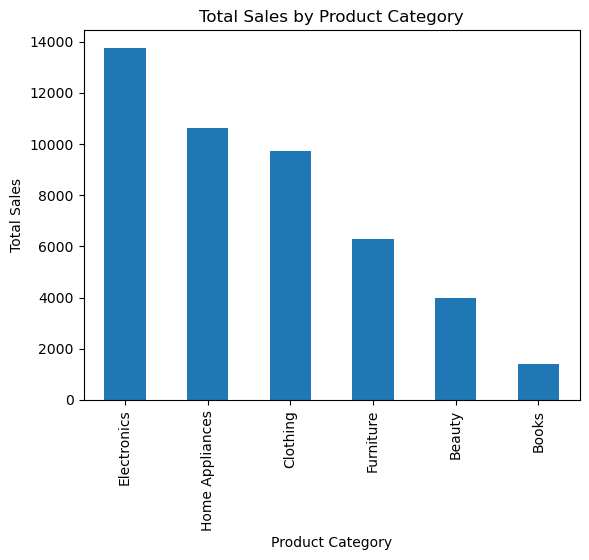

In [13]:
sales_by_category = df.groupby('product_category')['total_sales'].sum().sort_values(ascending=False)

plt.figure()
sales_by_category.plot(kind='bar')
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()


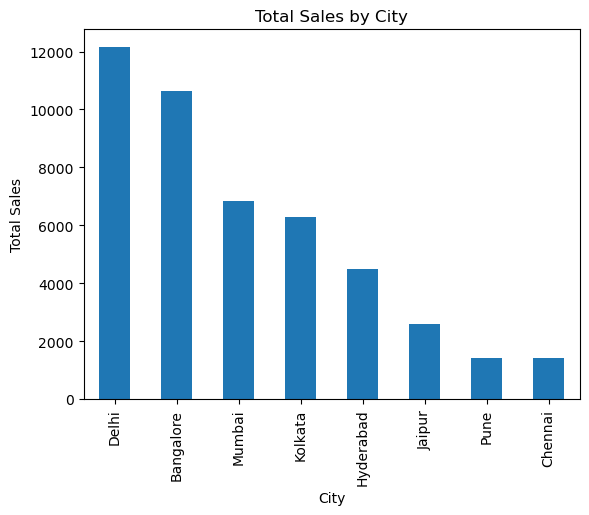

In [14]:
sales_by_city = df.groupby('city')['total_sales'].sum().sort_values(ascending=False)

plt.figure()
sales_by_city.plot(kind='bar')
plt.title("Total Sales by City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.show()


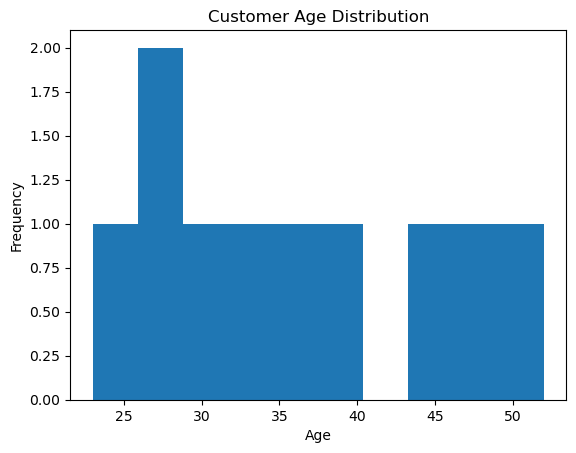

In [15]:
plt.figure()
plt.hist(df['age'])
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


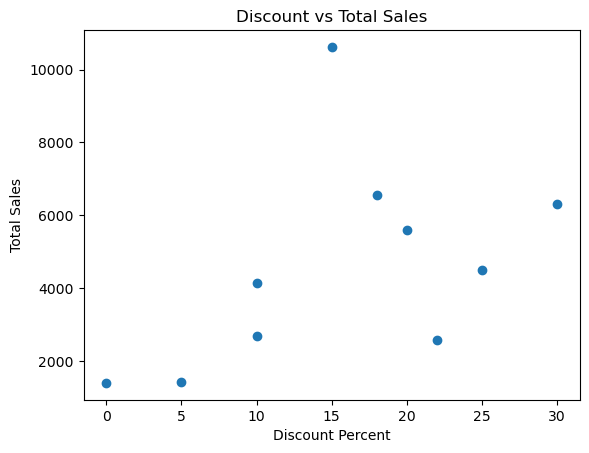

In [16]:
plt.figure()
plt.scatter(df['discount_percent'], df['total_sales'])
plt.title("Discount vs Total Sales")
plt.xlabel("Discount Percent")
plt.ylabel("Total Sales")
plt.show()


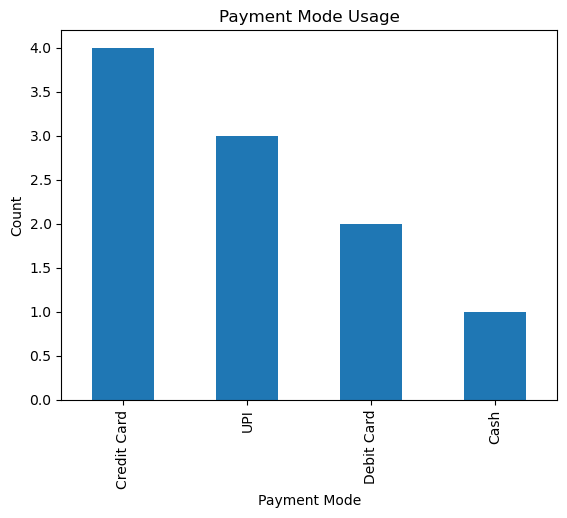

In [17]:
payment_counts = df['payment_mode'].value_counts()

plt.figure()
payment_counts.plot(kind='bar')
plt.title("Payment Mode Usage")
plt.xlabel("Payment Mode")
plt.ylabel("Count")
plt.show()


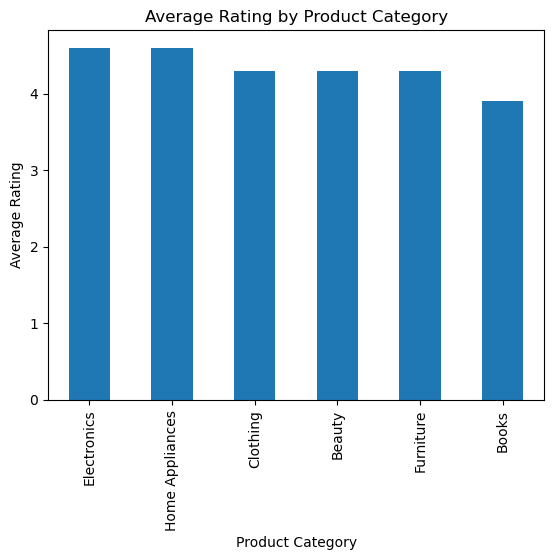

In [18]:
avg_rating_category = df.groupby('product_category')['rating'].mean().sort_values(ascending=False)

plt.figure()
avg_rating_category.plot(kind='bar')
plt.title("Average Rating by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Rating")
plt.show()


### 🔍 Key Insights
- Electronics generate the highest total revenue
- Metro cities dominate sales performance
- Customers aged 25–45 are the most active buyers
- Higher discounts are applied to high-value products
- Discounts do not negatively impact ratings
